In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [6]:
with open('dutch_tweets_chunk0.json', 'r') as f:
    data = json.load(f)

In [9]:
df = pd.read_json('dutch_tweets_chunk0.json')

In [21]:
dfs = []

# Loop through all the JSON files and load them into separate DataFrames
for i in range(10):
    filename = f"dutch_tweets_chunk{i}.json"
    with open(filename, 'r') as f:
        data = pd.read_json(f)
        dfs.append(data)

# Concatenate all the DataFrames into a single DataFrame
df = pd.concat(dfs)


In [35]:
df.head()

,full_text,text_translation,created_at,screen_name,description,desc_translation,weekofyear,weekday,day,month,...,point,latitude,longitude,altitude,province,hisco_standard,hisco_code,industry,sentiment_pattern,subjective_pattern
0,"@pflegearzt @Friedelkorn @LAguja44 Pardon, wol...",@pflegearzt @Friedelkorn @ LAguja44 Pardon wol...,2020-03-09 12:26:29,TheoRettich,"I ❤️science, therefore a Commie. ☭ FALGSC: P...","I ❤️science, Therefore a Commie. ☭ FALGSC: Par...",11.0,0.0,9.0,3.0,...,"(52.5001698, 5.7480821, 0.0)",52.50017,5.748082,0.0,Flevoland,None,None,False,0.0,0.0
1,RT @grantshapps: Aviation demand is reduced du...,RT @grantshapps: Aviation demand is reduced du...,2020-03-09 12:26:34,davidiwanow,I tweet a lot but love to engage & converse. P...,I tweet a lot but love to engage and converse....,11.0,0.0,9.0,3.0,...,"(52.3727598, 4.8936041, 0.0)",52.37276,4.893604,0.0,Noord-Holland,None,None,False,0.0,0.0
2,RT @DDStandaard: De droom van D66 wordt werkel...,RT @DDStandaard: The D66 dream come true: COVI...,2020-03-09 12:26:37,EricL65,None,None,11.0,0.0,9.0,3.0,...,None,NaN,NaN,0.0,False,None,None,False,0.0,0.0
3,RT @DDStandaard: De droom van D66 wordt werkel...,RT @DDStandaard: The D66 dream come true: COVI...,2020-03-09 12:26:37,EricL65,None,None,11.0,0.0,9.0,3.0,...,None,NaN,NaN,0.0,False,None,None,False,0.0,0.0
4,De droom van D66 wordt werkelijkheid: COVID-19...,The D66 dream becomes reality: COVID-19 super ...,2020-03-09 12:26:47,EhrErwin,Budget-Life Coach. Time management Coaching. b...,Budget-Life Coach. Time management coaching. h...,11.0,0.0,9.0,3.0,...,"(52.3727598, 4.8936041, 0.0)",52.37276,4.893604,0.0,Noord-Holland,None,None,False,0.0,0.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271342 entries, 0 to 27220
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   full_text           271331 non-null  object 
 1   text_translation    271328 non-null  object 
 2   created_at          271334 non-null  object 
 3   screen_name         271333 non-null  object 
 4   description         223646 non-null  object 
 5   desc_translation    223621 non-null  object 
 6   weekofyear          271328 non-null  float64
 7   weekday             271322 non-null  float64
 8   day                 271328 non-null  float64
 9   month               271322 non-null  float64
 10  year                271322 non-null  float64
 11  location            151361 non-null  object 
 12  point_info          134445 non-null  object 
 13  point               134445 non-null  object 
 14  latitude            134445 non-null  float64
 15  longitude           134445 non-null

In [117]:
df["industry"].value_counts()

False    201835
True      69480
Name: industry, dtype: int64

In [39]:
df.shape

(271342, 23)

In [50]:
df["screen_name"].value_counts().head(20)

s_akrati           1152
marco_kerkhofs      962
CoronaWorldStat     728
nieuwsbliknl        523
JeffreyMeursing     450
Queenoftheunse1     402
197winstonsmith     394
Andre3Verzaal       376
maryfloor           342
MonaSmitte          336
Watskeburtinmi1     332
Nelliejs501         326
OpenMarketingTV     300
Tweelingetje2V      282
marizsmn            261
fitasport1          252
elzet15             248
w12move             244
1_Vagabond          236
Omakoe2             234
Name: screen_name, dtype: int64

In [54]:
df.isna().sum()

full_text                 11
text_translation          14
created_at                 8
screen_name                9
description            47696
desc_translation       47721
weekofyear                14
weekday                   20
day                       14
month                     20
year                      20
location              119981
point_info            136897
point                 136897
latitude              136897
longitude             136897
altitude               16917
province                3105
hisco_standard        201860
hisco_code            201860
industry                   0
sentiment_pattern          0
subjective_pattern         0
dtype: int64

In [89]:
df['weekofyear'].unique()


array([11., 15., 30.,  6., 26., 19., 10., 32., 14., 18., 31.,  8.,  9.,
       28., 36.,  7., 27., 34., 20., 21., 16., 13.,  5., 38., 35., 25.,
       17., 37., 22., 12., 33., 23.,  4., 24., 29., 39., nan])

In [92]:
df['year'].unique()

array([2020.,   nan,    6.,   11.])

In [93]:
df = df[df['year'] == 2020]

In [95]:
df['day'].unique()

array([ 9.,  8., 22.,  5., 24., 10.,  3., 31., 13., 30.,  4.,  2., 19.,
       29., 12.,  1., 11., 23., 16., 20., 25., 28., 14.,  7., 27., 18.,
        6., 15., 21., 26., 17.])

In [96]:
df['month'].unique()

array([3., 4., 7., 2., 6., 5., 8., 9., 1.])

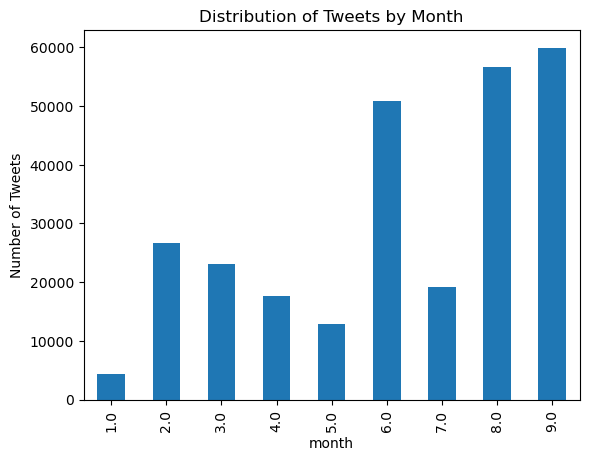

In [97]:
tweets_by_day = df.groupby('month')['full_text'].count()

tweets_by_day.plot(kind='bar')
plt.title('Distribution of Tweets by Month')
plt.xlabel('month')
plt.ylabel('Number of Tweets')
plt.show()


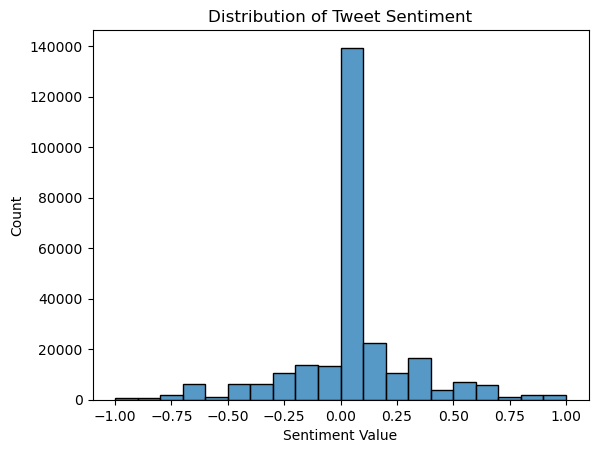

In [98]:
sentiment_data = df.dropna(subset=['sentiment_pattern'])

sns.histplot(sentiment_data['sentiment_pattern'], bins=20)
plt.title('Distribution of Tweet Sentiment')
plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.show()

In [99]:
df['location'].value_counts().head(10)

Amsterdam                     16134
The Netherlands                9469
Netherlands                    8505
Nederland                      8493
Amsterdam, Nederland           4193
Amsterdam, The Netherlands     3957
The Hague, The Netherlands     1318
Belgium                        1291
België                         1260
Rotterdam                      1063
Name: location, dtype: int64

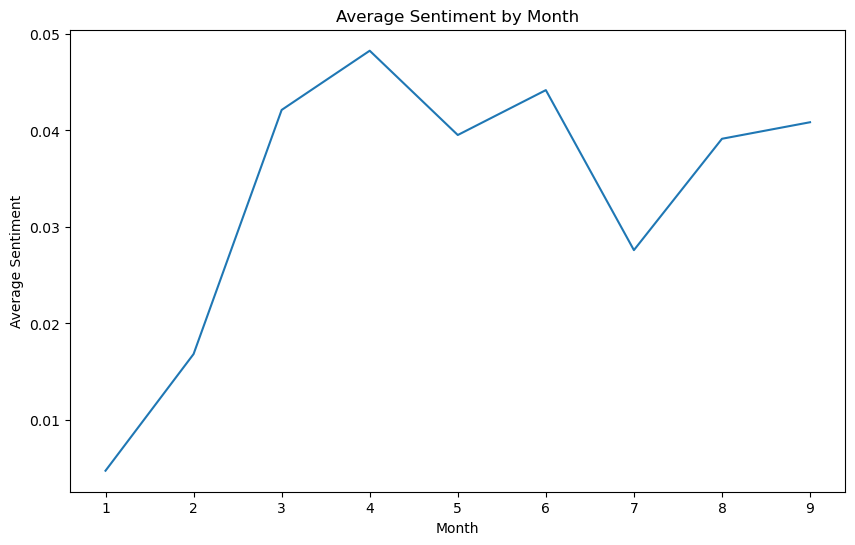

In [102]:
sentiment_by_month = df.groupby('month')['sentiment_pattern'].mean()

sentiment_by_month.plot(kind='line', figsize=(10, 6))
plt.title('Average Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.show()

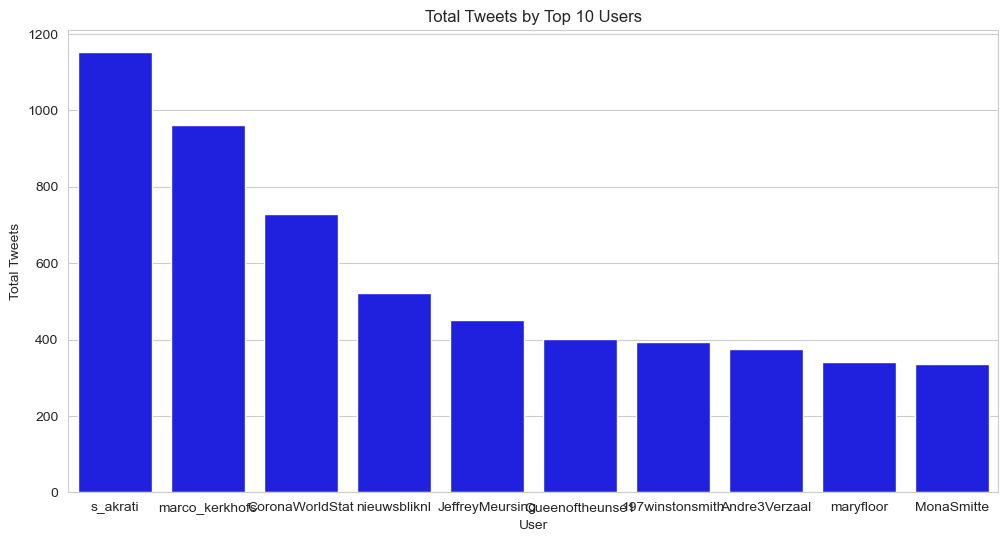

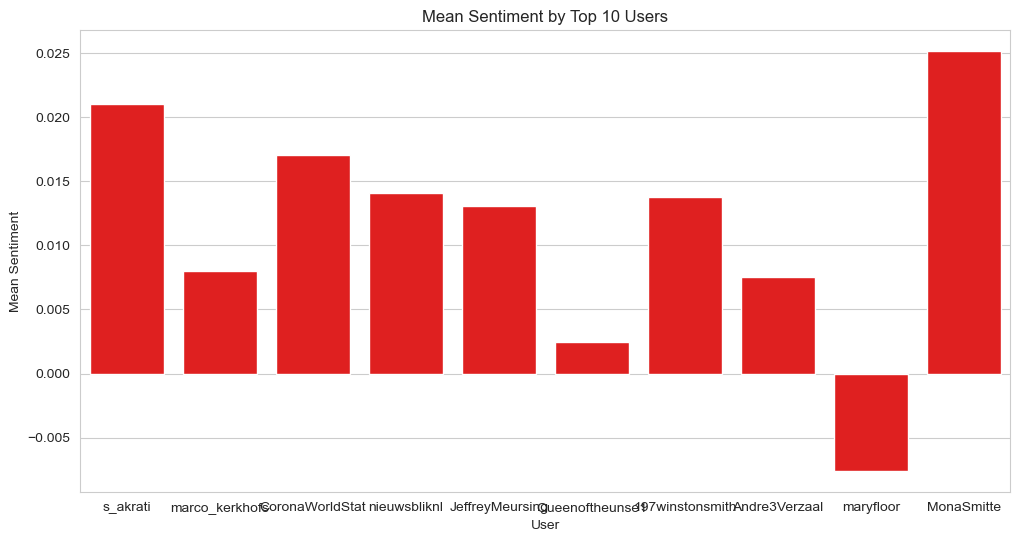

In [149]:
top_users = df['screen_name'].value_counts().nlargest(10).index.tolist()

# Calculate the total number of tweets and the mean sentiment status for each user
user_stats = []
for user in top_users:
    user_df = df[df['screen_name'] == user]
    total_tweets = len(user_df)
    mean_sentiment = user_df['sentiment_pattern'].mean()
    user_stats.append({'user': user, 'total_tweets': total_tweets, 'mean_sentiment': mean_sentiment})

# Convert the list of user stats into a pandas DataFrame
user_stats_df = pd.DataFrame(user_stats)

# Plot the results on a bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=user_stats_df, x='user', y='total_tweets', color='blue')
plt.ylabel('Total Tweets')
plt.xlabel('User')
plt.title('Total Tweets by Top 10 Users')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=user_stats_df, x='user', y='mean_sentiment', color='red')
plt.ylabel('Mean Sentiment')
plt.xlabel('User')
plt.title('Mean Sentiment by Top 10 Users')
plt.show()

In [109]:
df['sentiment_pattern'].mean()

0.0377732429854865

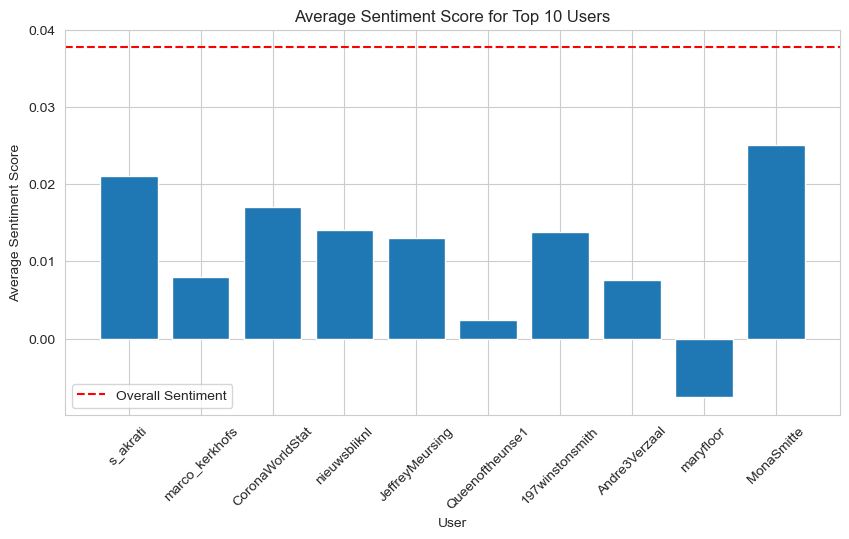

In [111]:
# Get the top 10 users with the most tweets
top_10_users = df['screen_name'].value_counts().nlargest(10)

# Calculate the average sentiment score for each user
user_sentiment = df.groupby('screen_name')['sentiment_pattern'].mean()

# Calculate the average sentiment score for all tweets
overall_sentiment = df['sentiment_pattern'].mean()

# Plot the results
plt.figure(figsize=(10,5))
plt.bar(top_10_users.index, user_sentiment[top_10_users.index])
plt.axhline(y=overall_sentiment, color='r', linestyle='--', label='Overall Sentiment')
plt.xticks(rotation=45)
plt.xlabel('User')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score for Top 10 Users')
plt.legend()
plt.show()


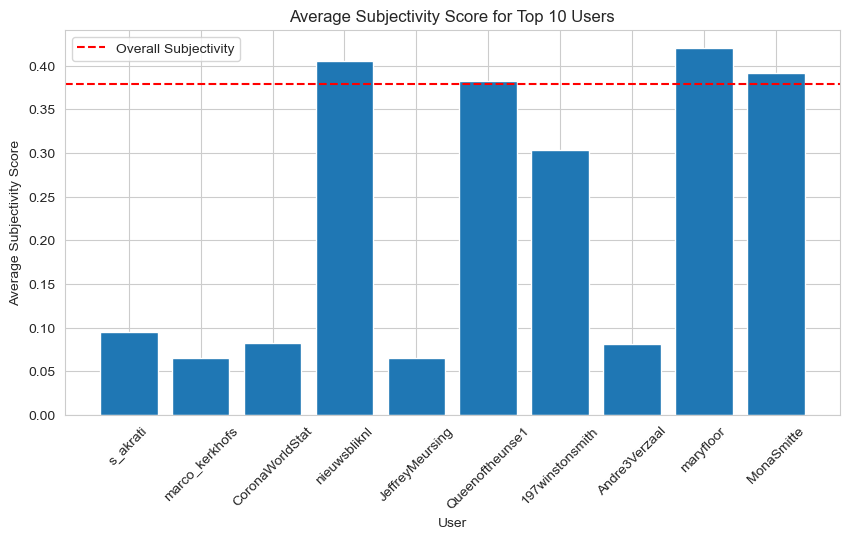

In [112]:
# Get the top 10 users with the most tweets
top_10_users = df['screen_name'].value_counts().nlargest(10)

# Calculate the average subjective score for each user
user_subjectivity = df.groupby('screen_name')['subjective_pattern'].mean()

# Calculate the average subjective score for all tweets
overall_subjectivity = df['subjective_pattern'].mean()

# Plot the results
plt.figure(figsize=(10,5))
plt.bar(top_10_users.index, user_subjectivity[top_10_users.index])
plt.axhline(y=overall_subjectivity, color='r', linestyle='--', label='Overall Subjectivity')
plt.xticks(rotation=45)
plt.xlabel('User')
plt.ylabel('Average Subjectivity Score')
plt.title('Average Subjectivity Score for Top 10 Users')
plt.legend()
plt.show()


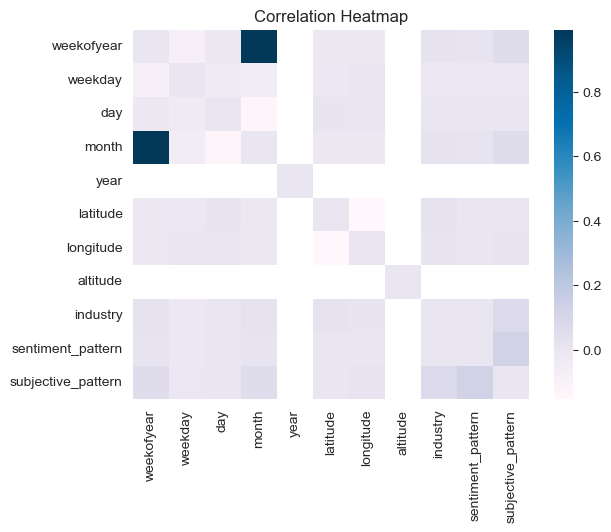

In [125]:
corr_matrix = df.corr()

# Set the diagonal values to zero
for i in range(len(corr_matrix.columns)):
    corr_matrix.iloc[i, i] = 0

sns.heatmap(corr_matrix, cmap='PuBu')
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:xlabel='weekday', ylabel='sentiment_pattern'>

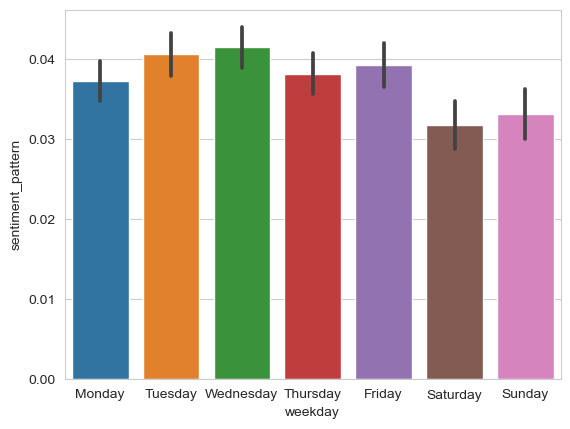

In [146]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(x='weekday', y='sentiment_pattern', data=df, order=weekday_order)

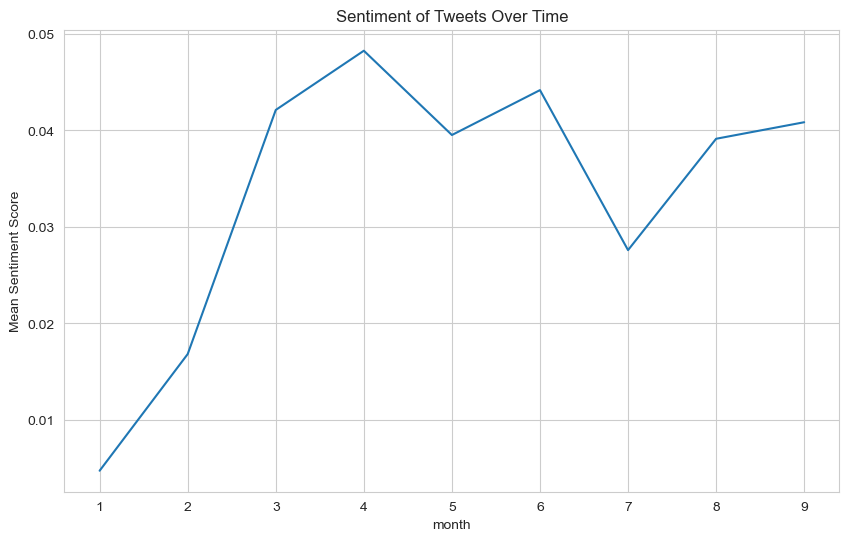

In [139]:
mean_sentiment_by_date = df.groupby('month')['sentiment_pattern'].mean()

# Plot the mean sentiment scores over time
mean_sentiment_by_date.plot(figsize=(10, 6))
plt.xlabel('month')
plt.ylabel('Mean Sentiment Score')
plt.title('Sentiment of Tweets Over Time')
plt.show()

In [137]:
# Create a dictionary to map numeric values to day names
day_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Replace the numeric values with day names
df['weekday'] = df['weekday'].replace(day_dict)
